### <p style="color:yellow;">Descrição do problema:</p>

Dados os obstáculos enfrentados pelo sistema educacional, a evasão escolar
desempenha um papel crucial, afetando estudantes de diferentes contextos
socioeconômicos. Com base nisso, este trabalho propõe **construir um modelo
preditivo baseado em técnicas de Ciência de Dados para prever a taxa de evasão no
ensino médio e técnico brasileiro**. O estudo aborda a complexidade deste fenômeno,
destacando a sua natureza social e a necessidade de soluções proativas. A
abordagem utiliza dados do censo escolar da educação básica e inclui a análise
exploratória de dados e técnicas de aprendizado de máquina. O modelo proposto visa
prever a evasão escolar, permitindo uma intervenção personalizada e prestando
apoio específico aos alunos desfavorecidos. Além de contribuir para a compreensão
dos fatores associados à evasão escolar, os resultados pretendem oferecer uma
abordagem inovadora para a prevenção desse fenômeno, indo além do meio
acadêmico de modo a proporcionar contribuições práticas ao campo educacional.

### <p style="color:yellow;">Algoritmos a serem utilizados:</p>

- **K-Nearest Neighbors (KNN)**:

    - Motivo: O KNN é um algoritmo que apesar de simples, pode ser útil para captar grupos similares entre os alunos, onde utiliza cálculos de distância para encontrar os vizinhos mais próximos a um ponto específico, atribuindo uma nova classe.

- **Random Forest**:

    - Motivo: Por se tratar de um algoritmo baseado em árvores de decisão, Random Forest pode ser uma solução robusta e capaz de lidar com diferentes características no conjunto de dados.

- **Logistic Regression**:

    - Motivo: É um modelo de fácil interpretação e bastante robusto e eficaz quando se trata de problemas de classificação ou quando há uma relação linear entre as carcterísticas e a probabilidade de evasão.


### Importação das bibliotecas

In [2]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
#from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import KFold, cross_validate, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder,  MinMaxScaler

from sklearn.compose import ColumnTransformer

#from sklearn.pipeline import Pipeline

#from scipy import stats
#from sklearn import model_selection
#from sklearn import metrics



import inflection
import warnings
warnings.filterwarnings("ignore")

In [3]:
dados_medio = pd.read_csv('dadosM.csv')
dados_medio.head()

,Carga Horária,Categoria da Situação,Cor/Raça,Data de Início do Ciclo,Data de Fim Previsto do Ciclo,Faixa Etária,Fator Esforço Curso,Idade,Instituição,Mês de Ocorrência da Situação,...,dia_inicio_ciclo,mes_inicio_ciclo,ano_inicio_ciclo,dia_fim_ciclo,mes_fim_ciclo,ano_fim_ciclo,dia_ocorrencia,mes_ocorrencia,ano_ocorrencia,delta_days
0,4560,0,branca,2017-04-07,2019-12-21,15 a 19 anos,1.0,18.0,CPII,2019-12-01,...,7,4,2017,21,12,2019,1,12,2019,968
1,4560,0,branca,2017-04-07,2019-12-21,15 a 19 anos,1.0,18.0,CPII,2019-12-01,...,7,4,2017,21,12,2019,1,12,2019,968
2,4560,0,branca,2017-04-07,2019-12-21,15 a 19 anos,1.0,18.0,CPII,2019-12-01,...,7,4,2017,21,12,2019,1,12,2019,968
3,4560,0,branca,2017-04-07,2019-12-21,15 a 19 anos,1.0,18.0,CPII,2019-12-01,...,7,4,2017,21,12,2019,1,12,2019,968
4,4560,0,branca,2017-04-07,2019-12-21,15 a 19 anos,1.0,18.0,CPII,2019-12-01,...,7,4,2017,21,12,2019,1,12,2019,968


### Renomeando colunas

In [4]:
dados_medio.columns = dados_medio.columns.str.replace(' ','')
new_cols = []
for column in dados_medio.columns:
    new_cols.append(inflection.underscore(column))
dados_medio.columns = new_cols

In [5]:
dados_medio.rename(columns={'categoriada_situação':'categoria_da_situação',
                            'datade_iníciodo_ciclo':'data_de_inicio_do_ciclo',
                            'datade_fim_previstodo_ciclo':'data_de_fim_previsto_do_ciclo',
                            'mêsde_ocorrênciada_situação':'mês_de_ocorrência_da_situação'},inplace=True)

In [ ]:
dados_medio.columns

Index(['carga_horária', 'categoria_da_situação', 'cor/raça',
       'data_de_inicio_do_ciclo', 'data_de_fim_previsto_do_ciclo',
       'faixa_etária', 'fator_esforço_curso', 'idade', 'instituição',
       'mês_de_ocorrência_da_situação', 'região', 'renda_familiar', 'sexo',
       'turno', 'uf', 'unidadede_ensino', 'dia_inicio_ciclo',
       'mes_inicio_ciclo', 'ano_inicio_ciclo', 'dia_fim_ciclo',
       'mes_fim_ciclo', 'ano_fim_ciclo', 'dia_ocorrencia', 'mes_ocorrencia',
       'ano_ocorrencia', 'delta_days'],
      dtype='object')

Existem algumas varíaveis que foram necessárias apenas para derivar outras e que não faz mais sentido mantê-las. São:
- data_de_inicio_do_ciclo
- data_de_fim_previsto_do_ciclo
- mês_de_ocorrência_da_situação

In [6]:
dados_medio.drop(columns=['data_de_inicio_do_ciclo','data_de_fim_previsto_do_ciclo',
                          'mês_de_ocorrência_da_situação'],inplace=True)

### Separação de Features e Target



In [7]:
features_medio = dados_medio.drop(columns=['categoria_da_situação'])
features_medio.head(3)

,carga_horária,cor/raça,faixa_etária,fator_esforço_curso,idade,instituição,região,renda_familiar,sexo,turno,...,dia_inicio_ciclo,mes_inicio_ciclo,ano_inicio_ciclo,dia_fim_ciclo,mes_fim_ciclo,ano_fim_ciclo,dia_ocorrencia,mes_ocorrencia,ano_ocorrencia,delta_days
0,4560,branca,15 a 19 anos,1.0,18.0,CPII,Região Sudeste,"1,5<RFP<=2,5",Feminino,Matutino,...,7,4,2017,21,12,2019,1,12,2019,968
1,4560,branca,15 a 19 anos,1.0,18.0,CPII,Região Sudeste,Não declarada,Masculino,Matutino,...,7,4,2017,21,12,2019,1,12,2019,968
2,4560,branca,15 a 19 anos,1.0,18.0,CPII,Região Sudeste,"RFP>3,5",Feminino,Matutino,...,7,4,2017,21,12,2019,1,12,2019,968


In [8]:
target_medio = dados_medio[['categoria_da_situação']]
target_medio.head(3)

,categoria_da_situação
0,0
1,0
2,0


In [ ]:
features_medio.shape

(4250, 22)

Devido o desbalanceamento entre as classes 0 e 1 (Concluinte e Evadido),faz-se necessário aplicarmos uma técnica de oversampling para aumentar o número da classe minoritária (1), alunos evadidos.

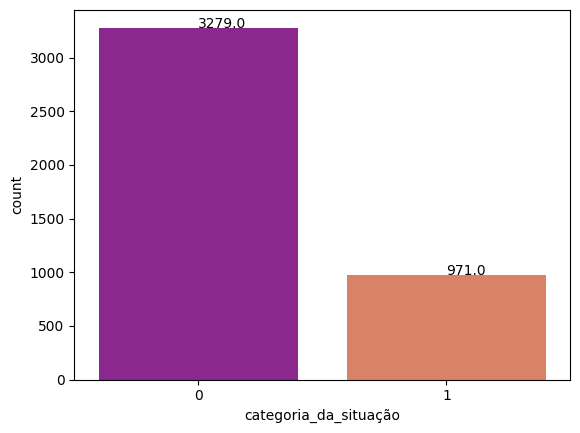

In [9]:
ax = sns.countplot(x='categoria_da_situação',data=target_medio,palette='plasma')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()))

### Pré-processamento das variáveis

Nesta etapa iremos definir os transformadores para codificar as variáveis categóricas, bem como escalonar as variáveis numéricas.

In [10]:
categorical_features = features_medio.select_dtypes(include=['object']).columns
numerical_features = features_medio.select_dtypes(exclude=['object']).columns

In [11]:
encoder = OneHotEncoder(handle_unknown='ignore',drop='first')
minmax_scaler = MinMaxScaler()

In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', minmax_scaler, numerical_features),
        ('categorical', encoder, categorical_features)
])

### Divisão entre Treino e Teste

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features_medio, target_medio, test_size=0.2, random_state=42)

### KNN

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier(metric="euclidean"))
])

In [ ]:
knn_params = {
           "classifier__n_neighbors": np.arange(1, 20, 2),
           "classifier__weights": ["uniform", "distance"],
}

> A função `make_scorer` retorna um objeto **scorer** que pode ser utilizado como um argumento para os métodos de validação cruzada e seleção de modelo do scikit-learn. O objeto scorer chama a função de avaliação com os argumentos `y_true` e `y_pred` e retorna a pontuação calculada (desempenho do modelo).






In [17]:
# métricas de avaliação
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary')
}

In [ ]:
# GridSearchCV com validação cruzada
grid_search = GridSearchCV(pipeline, knn_params, cv=10, scoring=scoring, refit='accuracy', return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         MinMaxScaler(),
                                                                         Index(['carga_horária', 'fator_esforço_curso', 'idade', 'dia_inicio_ciclo',
       'mes_inicio_ciclo', 'ano_inicio_ciclo', 'dia_fim_ciclo',
       'mes_fim_ciclo', 'ano_fim_ciclo', 'dia_ocorrencia', 'mes_ocorrencia',
       'ano_ocorrencia', 'delta_days'],
      dtype=...
             param_grid={'classifier__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'classifier__weights': ['uniform', 'distance']},
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score, average=binary),
                      'precision': make_scorer(precision_score, average=binary),
                      'recall': make_scorer(recall_score, average=binary)})

In [ ]:
results = grid_search.cv_results_

In [24]:
pd.set_option('max_colwidth', 400)

In [ ]:
metrics = ['mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1']
df_results = {'model':'KNN'}
for metric in metrics:
    df_results[metric] = f"{results[metric].mean():.2f} ± {results[metric].std():.2f}"
   # print(f"{metric}: {results[metric].mean():.2f} ± {results[metric].std():.2f}")
df_results = pd.DataFrame(df_results, index=[0])
df_results

,model,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1
0,KNN,0.87 ± 0.02,0.71 ± 0.06,0.74 ± 0.02,0.72 ± 0.03


In [ ]:
# melhor modelo nos dados de teste
best_model = grid_search.best_estimator_

# previsões no conjunto de teste
y_pred = best_model.predict(X_test)

# métricas no conjunto de teste
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
print(f'\nMétricas no conjunto de teste:')
print(f'Acurácia: {accuracy:.2f}')
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

print(f'\nMelhores parâmetros encontrados: {grid_search.best_params_}')


Métricas no conjunto de teste:
Acurácia: 0.88
Precisão: 0.75
Recall: 0.74
F1-Score: 0.75

Melhores parâmetros encontrados: {'classifier__n_neighbors': 19, 'classifier__weights': 'distance'}


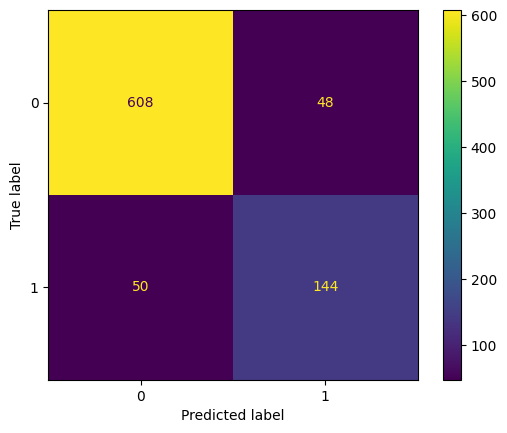

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Random Forest

In [14]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [15]:
rf_params = {
    "classifier__criterion": ["gini", "entropy"],
    "classifier__n_estimators": [100, 200, 300],
    "classifier__max_depth": [None, 10, 20, 30],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4],
}

In [18]:
# GridSearchCV com validação cruzada
grid_search = GridSearchCV(pipeline, rf_params, cv=10, scoring=scoring, refit='accuracy', return_train_score=True)

In [19]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         MinMaxScaler(),
                                                                         Index(['carga_horária', 'fator_esforço_curso', 'idade', 'dia_inicio_ciclo',
       'mes_inicio_ciclo', 'ano_inicio_ciclo', 'dia_fim_ciclo',
       'mes_fim_ciclo', 'ano_fim_ciclo', 'dia_ocorrencia', 'mes_ocorrencia',
       'ano_ocorrencia', 'delta_days'],
      dtype=...
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300]},
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score, average=binary),
                      'precision': make_scorer(precision_score, average=binary),
                      'recall': make_scorer(recall_score, average=binary)})

In [20]:
results = grid_search.cv_results_

In [21]:
metrics = ['mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1']
df_results = {'model':'Random Forest'}
for metric in metrics:
    df_results[metric] = f"{results[metric].mean():.2f} ± {results[metric].std():.2f}"
   # print(f"{metric}: {results[metric].mean():.2f} ± {results[metric].std():.2f}")
df_results = pd.DataFrame(df_results, index=[0])
df_results

,model,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1
0,Random Forest,0.96 ± 0.00,0.95 ± 0.00,0.89 ± 0.01,0.92 ± 0.00


In [23]:
# melhor modelo nos dados de teste
best_model = grid_search.best_estimator_

# previsões no conjunto de teste
y_pred = best_model.predict(X_test)

# métricas no conjunto de teste
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
print(f'\nMétricas no conjunto de teste:')
print(f'Acurácia: {accuracy:.2f}')
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

print(f'\nMelhores parâmetros encontrados: {grid_search.best_params_}')


Métricas no conjunto de teste:
Acurácia: 0.96
Precisão: 0.94
Recall: 0.90
F1-Score: 0.92

Melhores parâmetros encontrados: {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}


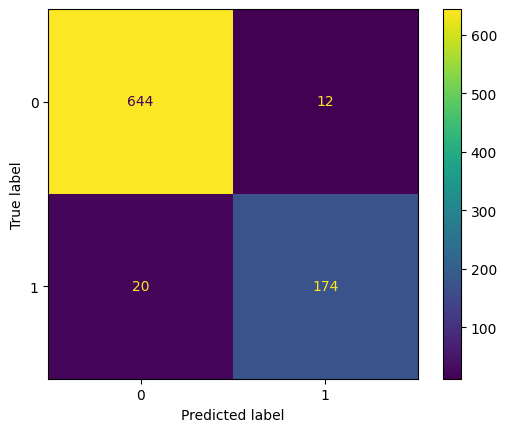

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [29]:
# salvando o modelo Random Forest
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(grid_search, f)

### Logistic Regression

In [41]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(solver="liblinear", max_iter=1000, random_state=42))
])

In [42]:
lr_params = {"classifier__penalty": ["l1", "l2"], "classifier__C": [0.1,1.2],"classifier__class_weight":['balanced',None]}

In [43]:
# GridSearchCV com validação cruzada
grid_search = GridSearchCV(pipeline, lr_params, cv=10, scoring=scoring, refit='accuracy', return_train_score=True)

In [44]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         MinMaxScaler(),
                                                                         Index(['carga_horária', 'fator_esforço_curso', 'idade', 'dia_inicio_ciclo',
       'mes_inicio_ciclo', 'ano_inicio_ciclo', 'dia_fim_ciclo',
       'mes_fim_ciclo', 'ano_fim_ciclo', 'dia_ocorrencia', 'mes_ocorrencia',
       'ano_ocorrencia', 'delta_days'],
      dtype=...
             param_grid={'classifier__C': [0.1, 1.2],
                         'classifier__class_weight': ['balanced', None],
                         'classifier__penalty': ['l1', 'l2']},
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score, average=binary),
                      'precision': make_scorer(precision_score, average=binary),
                      'recall': make_scorer(recall_score, average=binary)})

In [45]:
results = grid_search.cv_results_

In [47]:
metrics = ['mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1']
df_results = {'model':'Logistic Regression'}
for metric in metrics:
    df_results[metric] = f"{results[metric].mean():.2f} ± {results[metric].std():.2f}"
   # print(f"{metric}: {results[metric].mean():.2f} ± {results[metric].std():.2f}")
df_results = pd.DataFrame(df_results, index=[0])
df_results

,model,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1
0,Logistic Regression,0.87 ± 0.02,0.68 ± 0.03,0.80 ± 0.02,0.73 ± 0.03


In [48]:
# melhor modelo nos dados de teste
best_model = grid_search.best_estimator_

# previsões no conjunto de teste
y_pred = best_model.predict(X_test)

# métricas no conjunto de teste
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
print(f'\nMétricas no conjunto de teste:')
print(f'Acurácia: {accuracy:.2f}')
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

print(f'\nMelhores parâmetros encontrados: {grid_search.best_params_}')


Métricas no conjunto de teste:
Acurácia: 0.87
Precisão: 0.68
Recall: 0.84
F1-Score: 0.75

Melhores parâmetros encontrados: {'classifier__C': 1.2, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l1'}


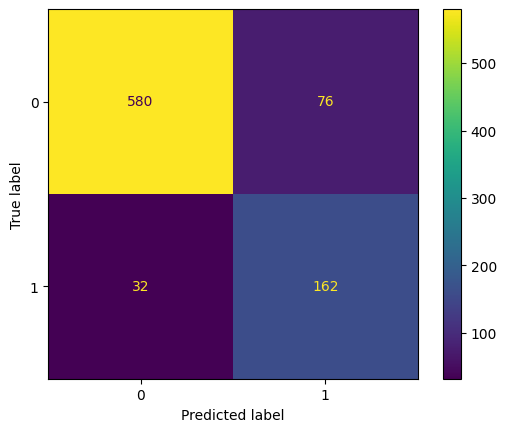

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Conclusões


O melhor modelo foi a Random Forest. Explicação:

> **Recall:**
-  No problema da evasão estudantil, o foco principal é identificar todos os alunos em risco, que significa maximizar o recall, uma vez que essa métrica nos dá a probabilidade de uma classe positiva ser corretamente classificada. O recall do modelo no conjunto de teste foi de 90%, garantindo que poucos alunos evadidos fossem deixados de fora, isto é, 90% dos evadidos foram corretamente classificados pelo modelo.

> **Precisão:**
- Essa também é uma métrica importante se quisermos priorizar alarmes falsos, que seriam os casos de falsos positivos - quando o aluno não é evadido, mas o modelo classifica como tal. O modelo apresentou uma precisão de 94%, ou seja, de todos os alunos que ele classificou como evadido, ele esteve correto em 94% das vezes. Isso garante que esforços de intervenção não sejam desperdiçados em alunos que não estejam em risco.